In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.stats.api as sms
%matplotlib inline

In [2]:
count = np.array([4782, 3447])
nobs = np.array([10000, 10000])

res=sms.test_proportions_2indep(count[0], nobs[0], count[1], nobs[1], value=None, compare='diff', alternative='two-sided')
stat, pval = sms.proportions_ztest(count, nobs, prop_var=(4825 + 3409)/(10000 + 10000))

print("Our calculated p-value using method 1:", res.pvalue)
print("Our calculated p-value using method 2:",  pval)

Our calculated p-value using method 1: 1.6856083502187974e-83
Our calculated p-value using method 2: 5.311097444932062e-82


In [3]:
count = np.array([86, 68])
nobs = np.array([164, 164])

res=sms.test_proportions_2indep(count[0], nobs[0], count[1], nobs[1], value=None, compare='diff', alternative='two-sided')

print("Our calculated p-value is:",  pval)

Our calculated p-value is: 5.311097444932062e-82


In [4]:
effect_size = sms.proportion_effectsize(0.13, 0.15)    # Calculating effect size based on our expected rates


required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  # Calculating sample size needed

required_n = np.ceil(required_n)                          # Rounding up to next whole number                          

print("required number of samples is:", required_n)

required number of samples is: 4720.0


In [5]:
file_path = 'ab_data.csv'

df = pd.read_csv(file_path)

print(df.head(5))
print('\n')
print(df.info())
print('\n')
print("Observe that there are 294478 rows in the dataframe")

   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


Observe that there are 294478 rows in the dataframe


In [6]:
def fix_group(val):
    if pd.isnull(val):
        return val 
    if val == "control":
        return "old_page"
    return "new_page"

df.loc[:, "landing_page"] = df.loc[:, "group"].apply(fix_group)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [7]:
df = df.drop_duplicates(subset="user_id", keep=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286690 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       286690 non-null  int64 
 1   timestamp     286690 non-null  object
 2   group         286690 non-null  object
 3   landing_page  286690 non-null  object
 4   converted     286690 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.1+ MB


In [8]:
dfControlSample = df.loc[df['group'] == 'control'].sample(n=4720)
dfTreatmentSample = df.loc[df['group'] == 'treatment'].sample(n=4720)

In [9]:
conversion_control = len(dfControlSample.loc[dfControlSample["converted"] == 1])
conversion_treatment = len(dfTreatmentSample.loc[dfTreatmentSample["converted"] == 1])

control_rate = conversion_control/4720
treatment_rate = conversion_treatment/4720

print("The control conversion rate is ", control_rate)
print("The treatment conversion rate is ", treatment_rate)

The control conversion rate is  0.11228813559322035
The treatment conversion rate is  0.11843220338983051


<BarContainer object of 2 artists>

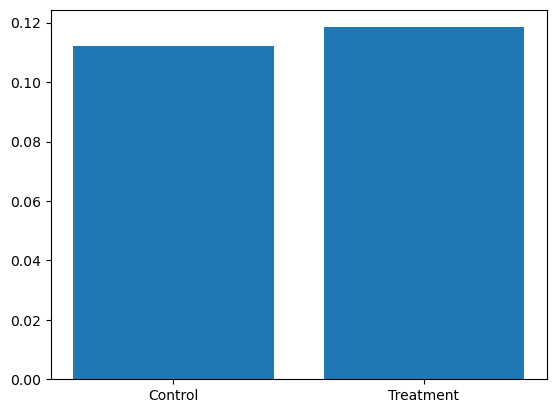

In [10]:
x = ["Control", "Treatment"]
y = [control_rate, treatment_rate]

plt.bar(x,y)

In [11]:
count = np.array([544, 579])
nobs = np.array([4720, 4720])

res=sms.test_proportions_2indep(count[0], nobs[0], count[1], nobs[1], value=None, compare='diff', alternative='two-sided')

print("Our calculated p-value is:",  pval)

Our calculated p-value is: 5.311097444932062e-82


In [12]:
sms.confint_proportions_2indep(544, 4720, 579, 4720, alpha=0.05)

(-0.020486928196616797, 0.005653155521651456)

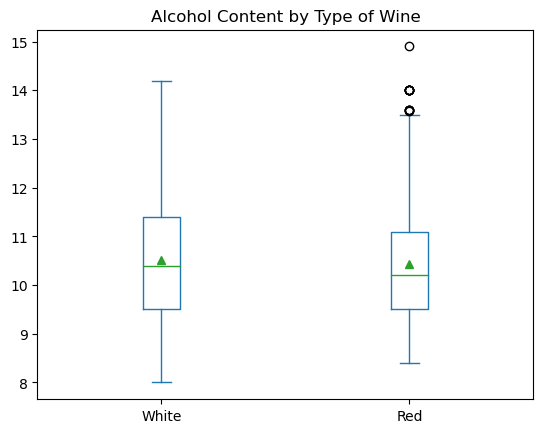

In [13]:
dfWhite = pd.read_csv("winequality-white.csv", sep=";")
dfRed = pd.read_csv("winequality-red.csv", sep=";")
dfBoth = pd.DataFrame({"White": dfWhite["alcohol"], "Red": dfRed["alcohol"]})

ax = dfBoth[["White", "Red"]].plot(kind="box", title = "Alcohol Content by Type of Wine", showmeans=True)

In [14]:
res = stats.ttest_ind(dfWhite.mean(),dfRed.mean(), equal_var=False,)
print("The calculated p-value is", res.pvalue)

The calculated p-value is 0.4428497459402534


In [15]:
cm=sms.CompareMeans(sms.DescrStatsW(dfWhite.mean()),sms.DescrStatsW(dfRed.mean()))

cm.tconfint_diff(alpha=0.05, usevar='unequal')

(-16.305725457439795, 35.22656431811906)

In [16]:
from scipy.stats import chi2

(array([5.181e+03, 3.079e+03, 1.131e+03, 4.190e+02, 1.290e+02, 3.600e+01,
        1.700e+01, 3.000e+00, 3.000e+00, 2.000e+00]),
 array([9.60816483e-03, 2.44745213e+00, 4.88529610e+00, 7.32314007e+00,
        9.76098404e+00, 1.21988280e+01, 1.46366720e+01, 1.70745159e+01,
        1.95123599e+01, 2.19502039e+01, 2.43880478e+01]),
 <BarContainer object of 10 artists>)

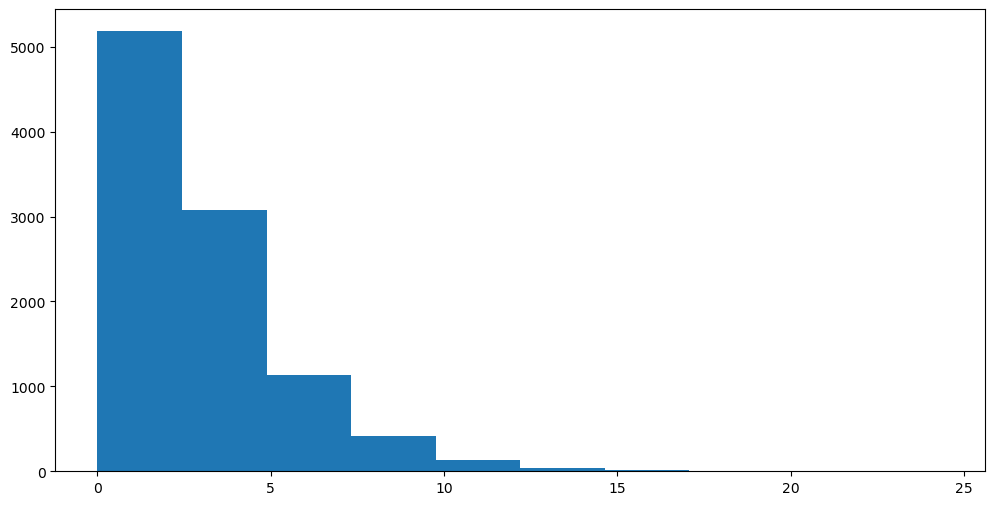

In [17]:
d = 3 
x = chi2.rvs(d, size=10000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.hist(x)

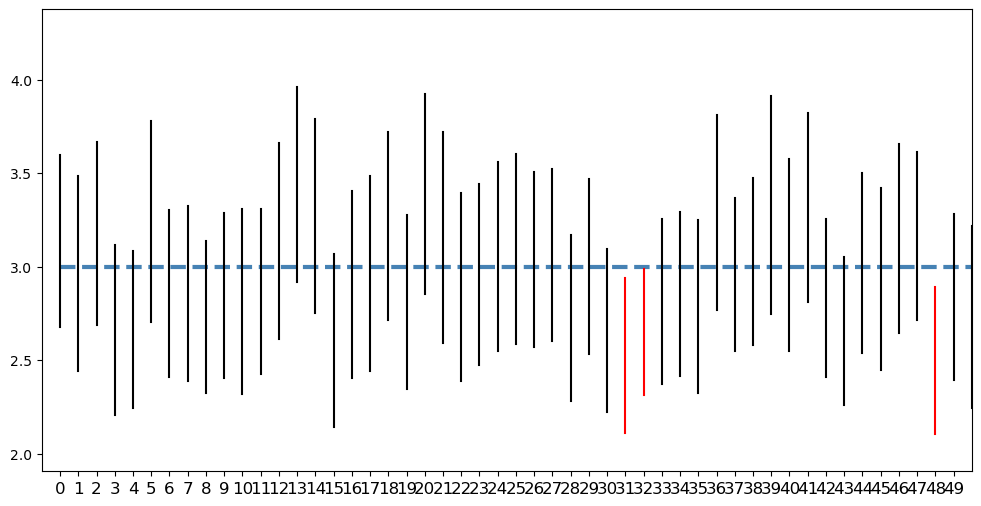

In [26]:
def confidence_intervals(m=500, n=100):
    # TODO
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    ax.plot([0,50], [3, 3], color="steelblue", ls='--', lw=3)
    
    for num in range(m):
        d = 3 
        x = chi2.rvs(d, size=n)
        (CImin, CImax) = stats.t.interval(0.95, df=len(x)-1, loc=np.mean(x), scale=stats.sem(x))
        if CImin > 3 or CImax < 3:
            ax.plot([num, num], [CImin, CImax], color="red")
        else:
            ax.plot([num, num], [CImin, CImax], color="black")
        
    ax.set_xlim([-1,50])
    plt.xticks(range(50), fontsize=12)
    
confidence_intervals(500, 100)